In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [23]:
from decimal import Decimal

#silicon HV data for neutrons
import pandas as pds
import os

si_data = pds.read_csv('papers/data/silicon_HV_neutron_full.txt', skiprows=1, \
                         names=['recoilE', 'rate'])


print (si_data.head(100))

si_erec = np.asarray(si_data["recoilE"],dtype=float)
si_rate = np.asarray(si_data["rate"])
si_erec = 10**si_erec
si_rate = 10**si_rate
print(si_erec)



    recoilE    rate
0   -1.3887 -0.4070
1   -1.3887 -0.3833
2   -1.3824 -0.3596
3   -1.3761 -0.3357
4   -1.3699 -0.3357
..      ...     ...
95  -1.1818 -0.6175
96  -1.1755 -0.5937
97  -1.1755 -0.5701
98  -1.1693 -0.5464
99  -1.1693 -0.5227

[100 rows x 2 columns]
[ 0.04086015  0.04086015  0.0414572   0.04206298  0.04266778  0.04329124
  0.0439137   0.04455536  0.04520641  0.0458564   0.04652646  0.0472063
  0.04789608  0.04858475  0.04929467  0.05001497  0.0507341   0.05147543
  0.05222759  0.05222759  0.05222759  0.05297854  0.05297854  0.05375266
  0.05375266  0.0545381   0.0545381   0.0545381   0.05533501  0.05533501
  0.05533501  0.05533501  0.05613064  0.05613064  0.05613064  0.05613064
  0.05695082  0.05695082  0.05695082  0.05695082  0.05778299  0.05778299
  0.05778299  0.05778299  0.05778299  0.05778299  0.05778299  0.05861382
  0.05861382  0.05861382  0.05861382  0.05861382  0.05861382  0.05861382
  0.05861382  0.05947028  0.06033926  0.06033926  0.06033926  0.06033926
  0.060

In [24]:
#smooth the data
si_rate_smooth = signal.savgol_filter(si_rate, 501, 3) # window size 501, polynomial order 3

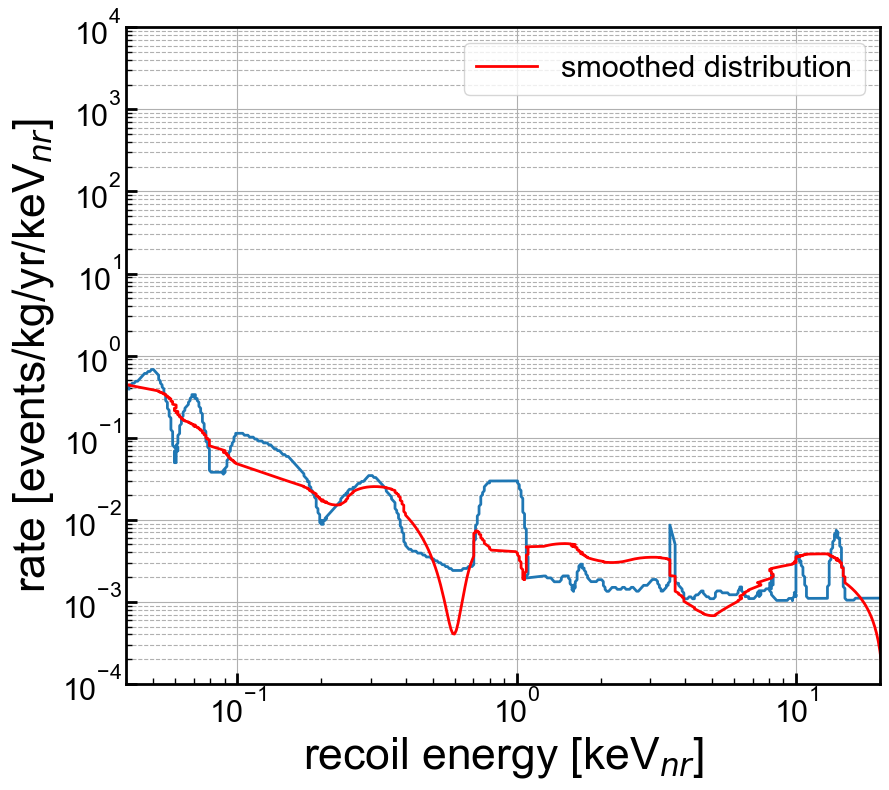

In [25]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



#print(estring)
ax1.plot(si_erec, si_rate)
ax1.plot(si_erec, si_rate_smooth,color='r',label="smoothed distribution")


ymin = 1e-4
ymax = 1e4

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.loglog()
plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(4e-2, 2e1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV$_{nr}$]')
ax1.set_ylabel('rate [events/kg/yr/keV$_{nr}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()